# Transfer learning en el modelo YOLOv8
* Alumno: Imanol Brayan Moscoso Apaza

## Acceso al GPU

In [ ]:
!nvidia-smi

Thu Aug 10 04:06:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root_dir = '/content/drive/MyDrive/Yolov8_detection'

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.7/616.7 kB 7.5 MB/s eta 0:00:00


## Cargar el modelo pre-entrenado de yolo

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model.info()


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

(225, 3157200, 0, 0.0)

## Arquitectura de YOLOv8

<img src="https://blog.roboflow.com/content/images/size/w1000/2023/01/image-16.png" alt="Arquitectura yolov8" width=900/>

## Congelamiento de las capas del backbone

In [ ]:
def freeze_layer(trainer):
    model = trainer.model
    num_freeze = 10 # the first 10 layers represent the backbone
    print(f"Freezing {num_freeze} layers")
    freeze = [f'model.{x}.' for x in range(num_freeze)]  # layers to freeze
    for k, v in model.named_parameters():
        v.requires_grad = True  # train all layers
        if any(x in k for x in freeze):
            print(f'freezing {k}')
            v.requires_grad = False
    print(f"{num_freeze} layers are freezed.")

## Agrega la función de congelamiento al modelo

In [ ]:
model.add_callback("on_train_start", freeze_layer)

## Entrenar el modelo con el dataset ptopuesto

In [ ]:
model.train(data=os.path.join(root_dir,"csgo-kaggle.yaml"), epochs=5)  # train the model

Ultralytics YOLOv8.0.151 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Yolov8_detection/csgo-kaggle.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=F

Freezing 10 layers
freezing model.0.conv.weight
freezing model.0.bn.weight
freezing model.0.bn.bias
freezing model.1.conv.weight
freezing model.1.bn.weight
freezing model.1.bn.bias
freezing model.2.cv1.conv.weight
freezing model.2.cv1.bn.weight
freezing model.2.cv1.bn.bias
freezing model.2.cv2.conv.weight
freezing model.2.cv2.bn.weight
freezing model.2.cv2.bn.bias
freezing model.2.m.0.cv1.conv.weight
freezing model.2.m.0.cv1.bn.weight
freezing model.2.m.0.cv1.bn.bias
freezing model.2.m.0.cv2.conv.weight
freezing model.2.m.0.cv2.bn.weight
freezing model.2.m.0.cv2.bn.bias
freezing model.3.conv.weight
freezing model.3.bn.weight
freezing model.3.bn.bias
freezing model.4.cv1.conv.weight
freezing model.4.cv1.bn.weight
freezing model.4.cv1.bn.bias
freezing model.4.cv2.conv.weight
freezing model.4.cv2.bn.weight
freezing model.4.cv2.bn.bias
freezing model.4.m.0.cv1.conv.weight
freezing model.4.m.0.cv1.bn.weight
freezing model.4.m.0.cv1.bn.bias
freezing model.4.m.0.cv2.conv.weight
freezing model

        1/5      1.47G      1.624        3.2      1.114         40        640: 100%|██████████| 79/79 [01:21<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]
                   all         24         76      0.693      0.131      0.214      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        2/5      1.37G      1.555      2.152      1.098         22        640: 100%|██████████| 79/79 [00:55<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]
                   all         24         76      0.446      0.527      0.401      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        3/5      1.35G      1.561      1.823      1.094         17        640: 100%|██████████| 79/79 [00:54<00:00,  1.46it/s]
           

In [ ]:
from IPython.display import display, Image

runs_path = '/content/runs/'

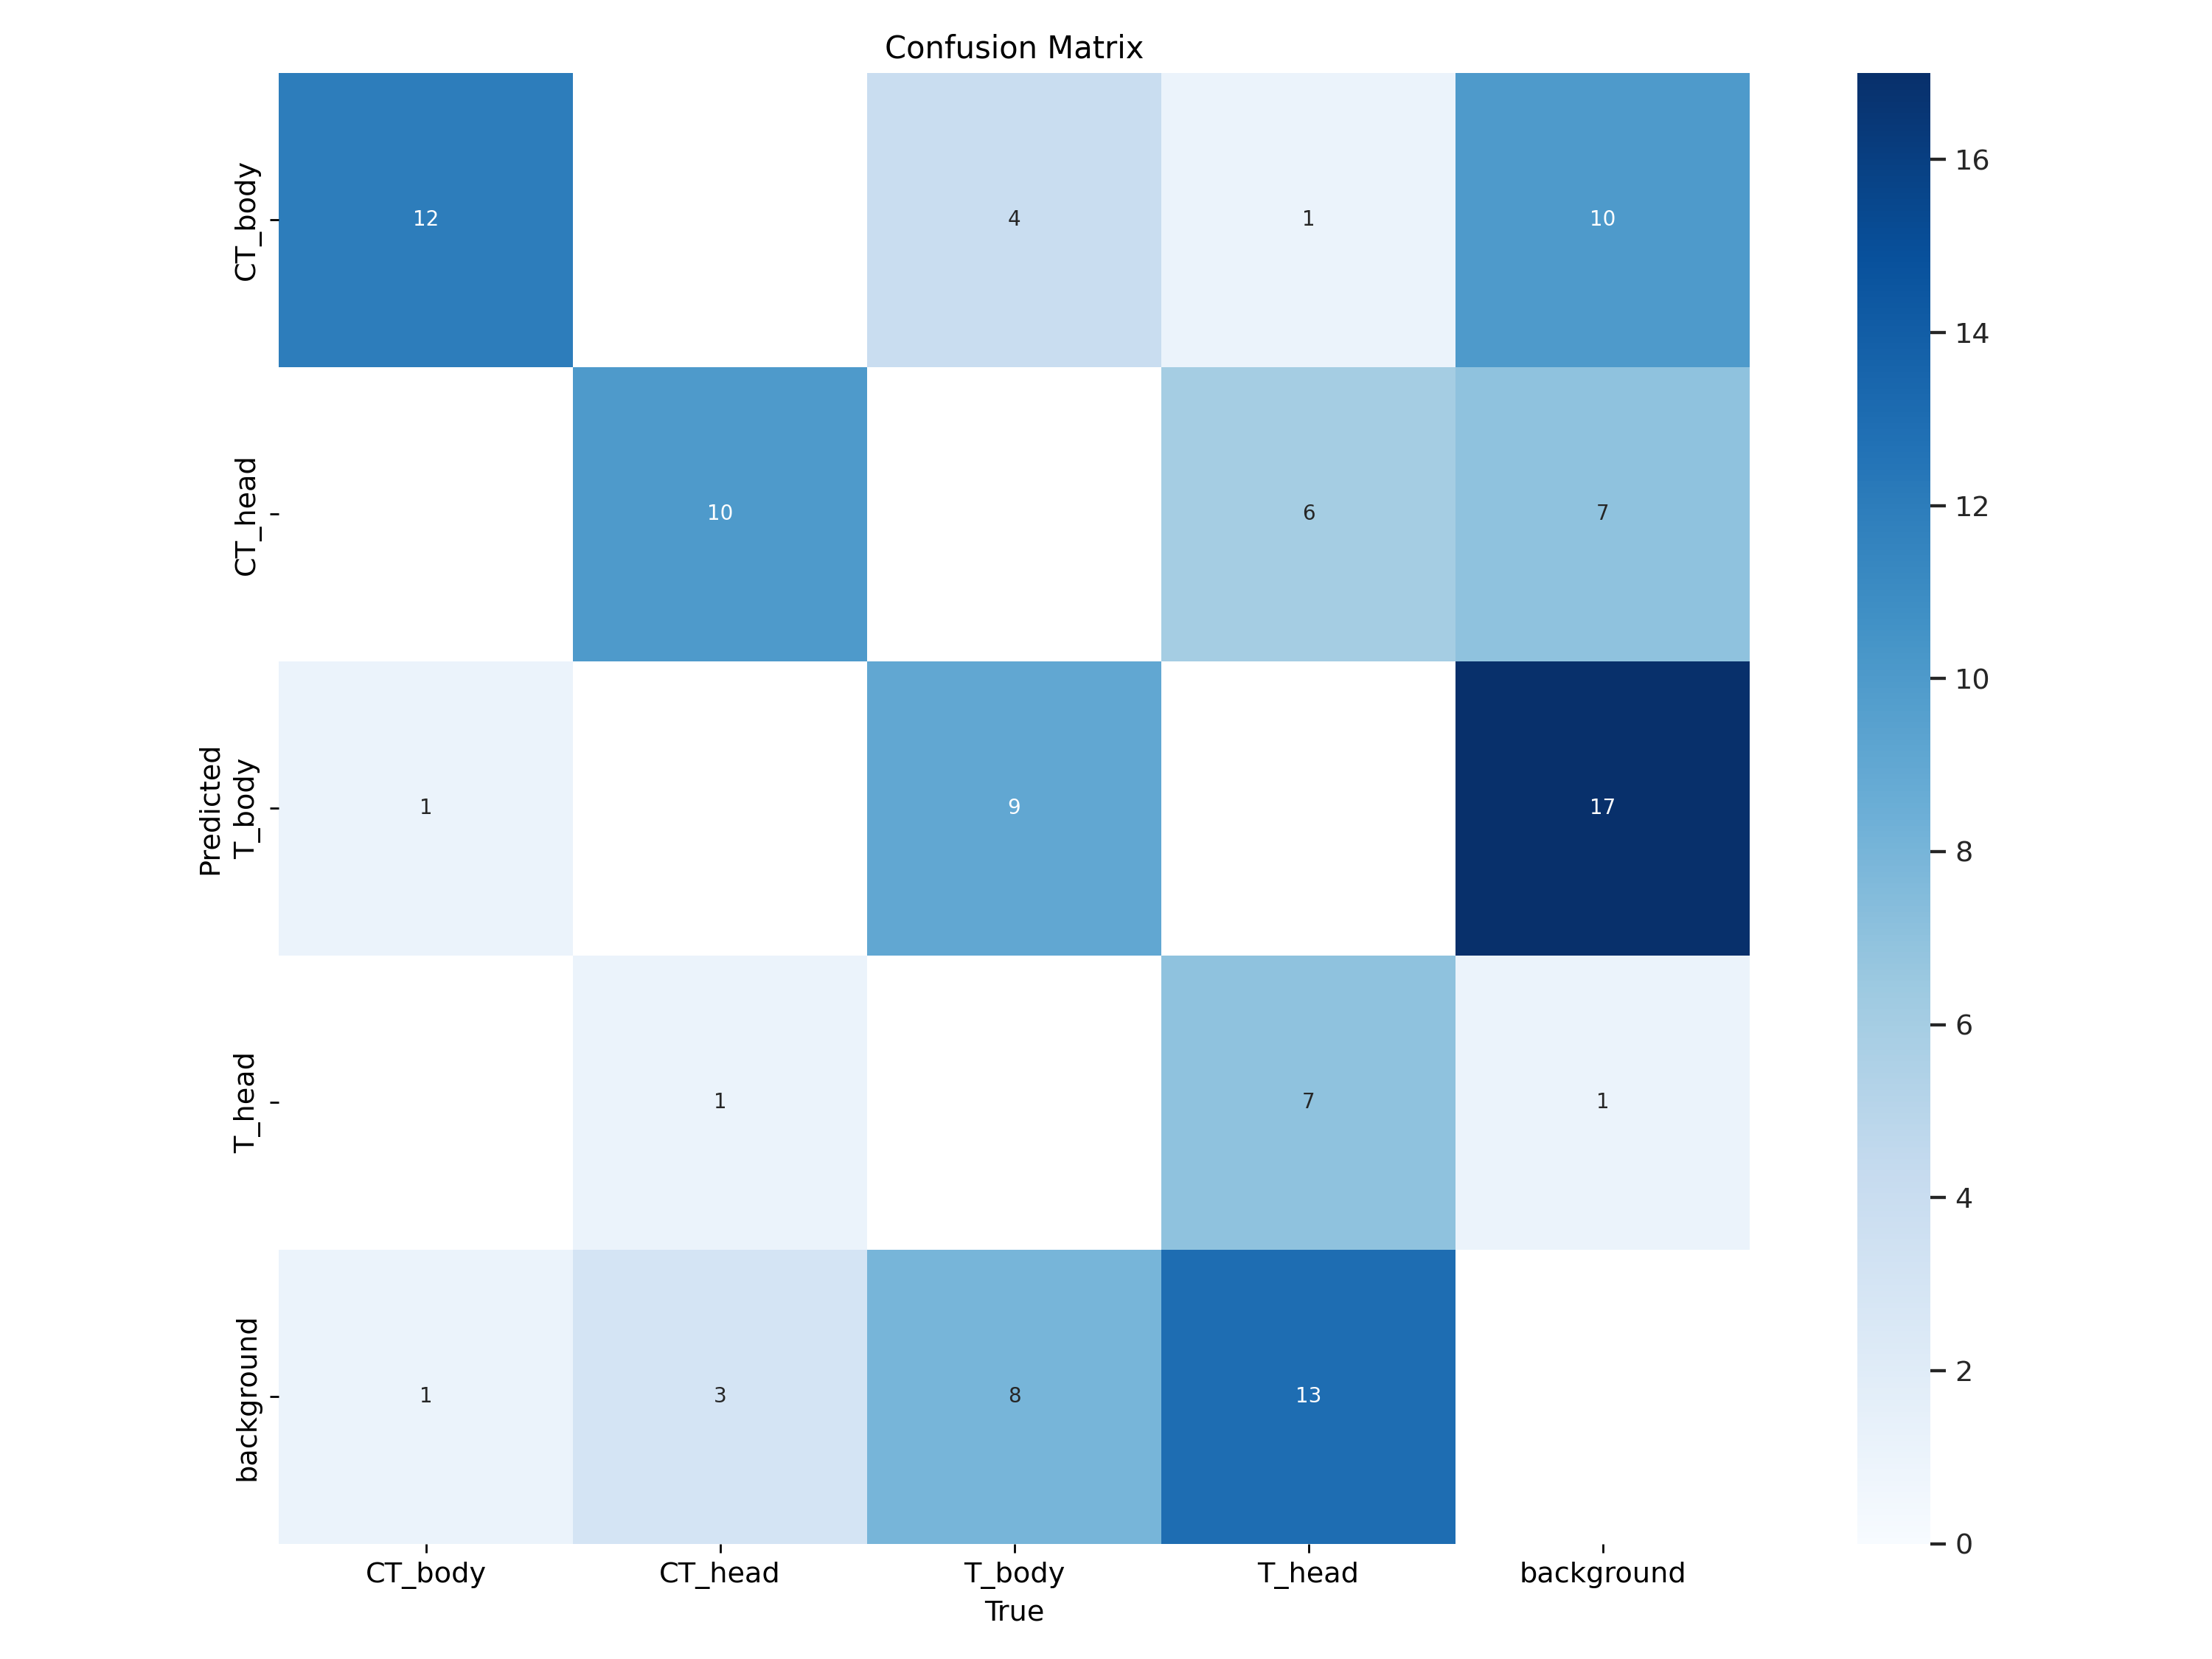

In [ ]:
Image(filename=f'{runs_path}/detect/train/confusion_matrix.png', width=800)

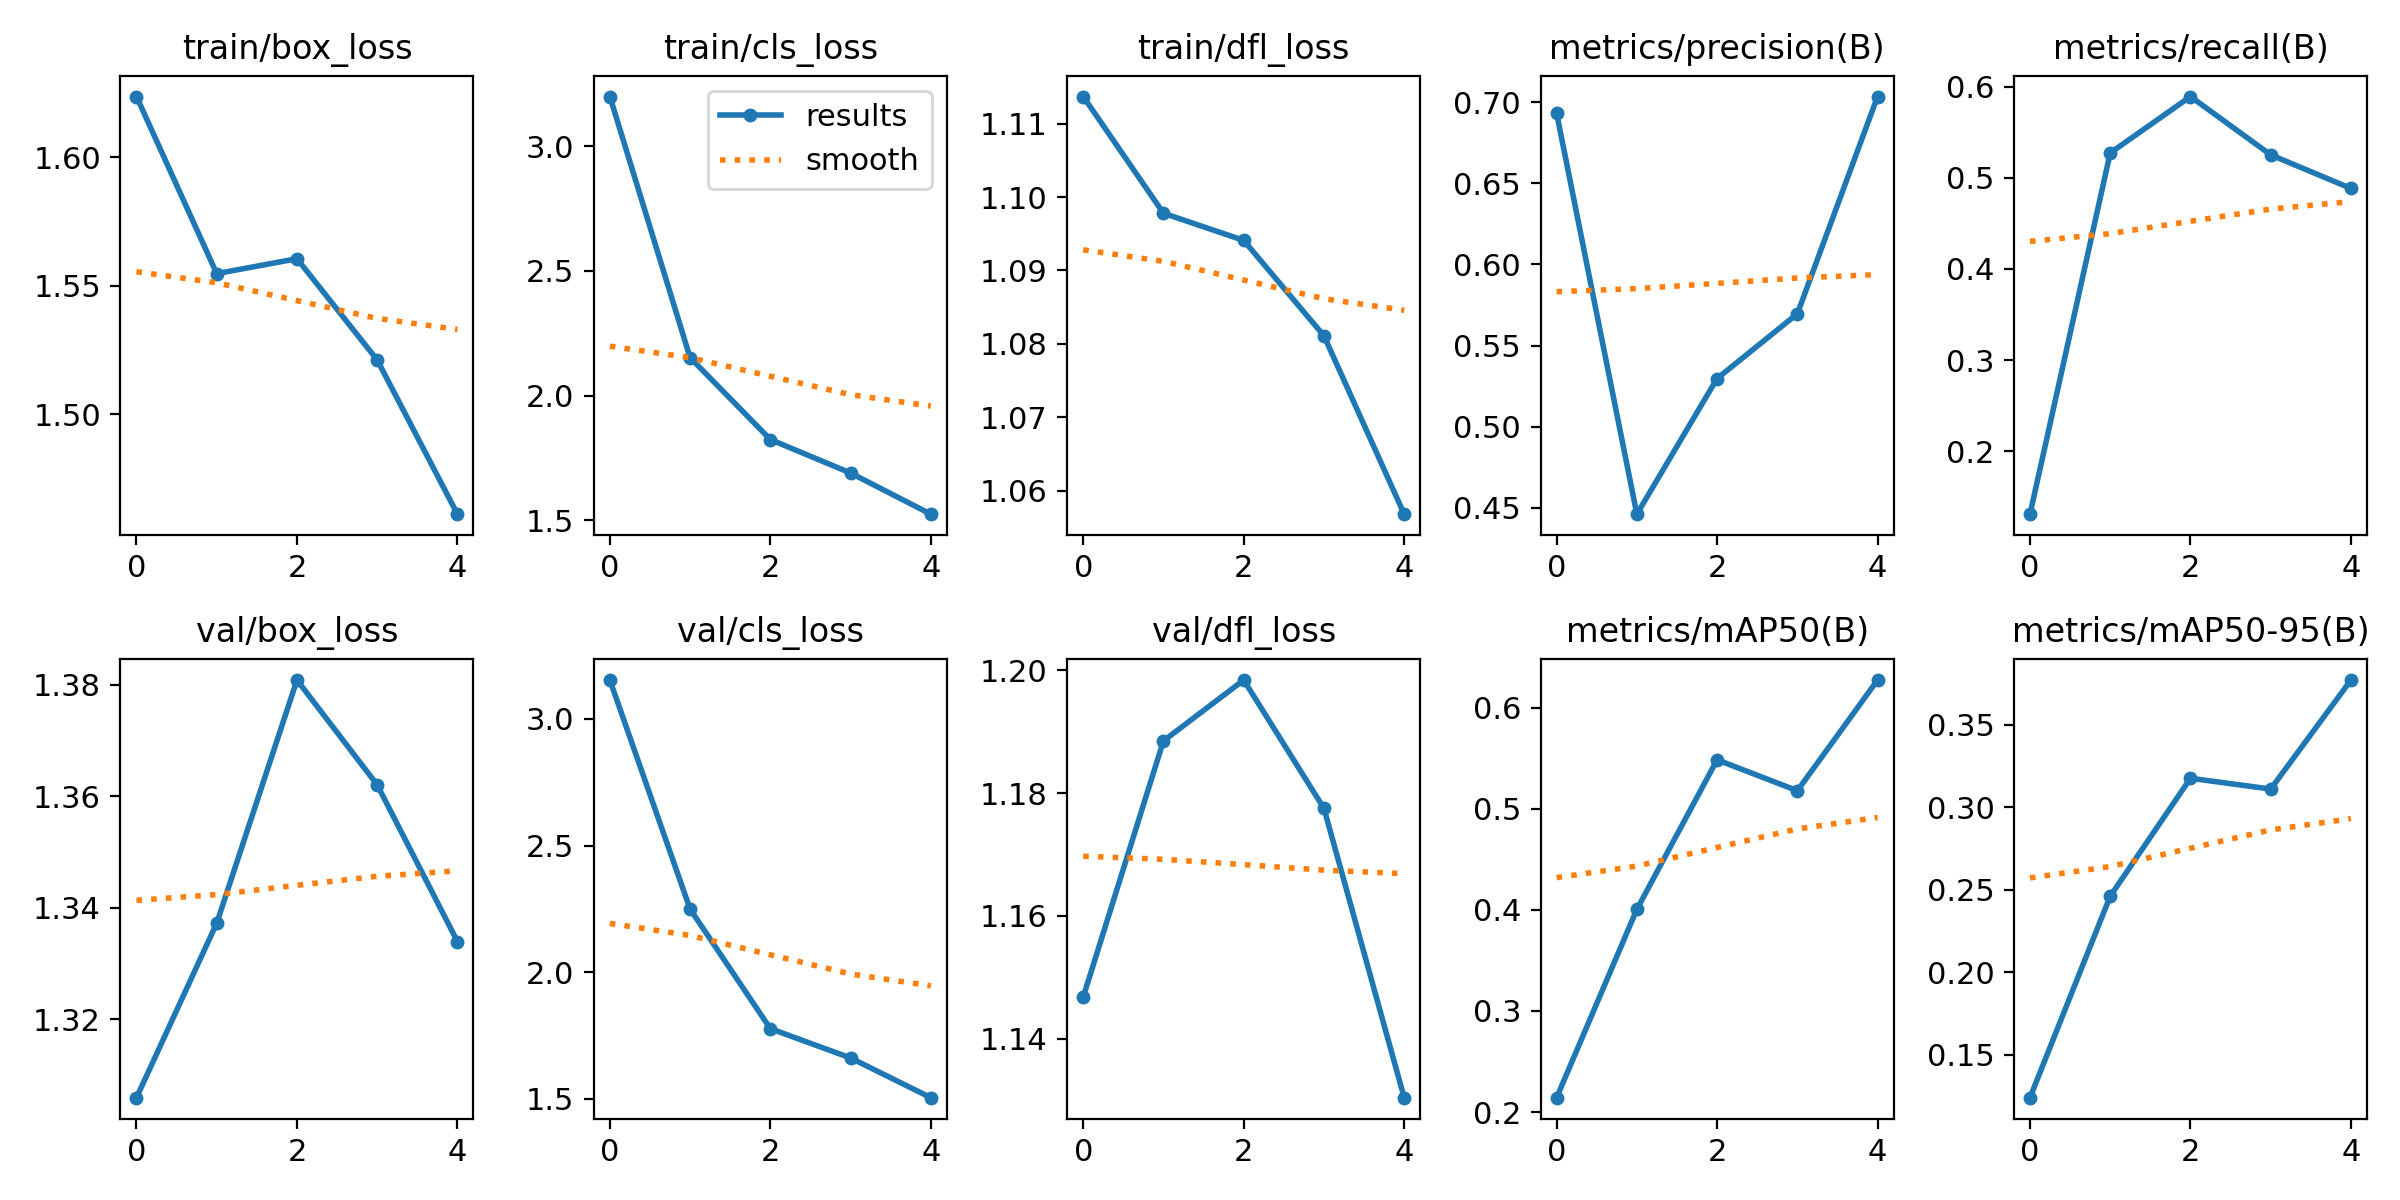

In [ ]:
Image(filename=f'{runs_path}/detect/train/results.png', width=800)

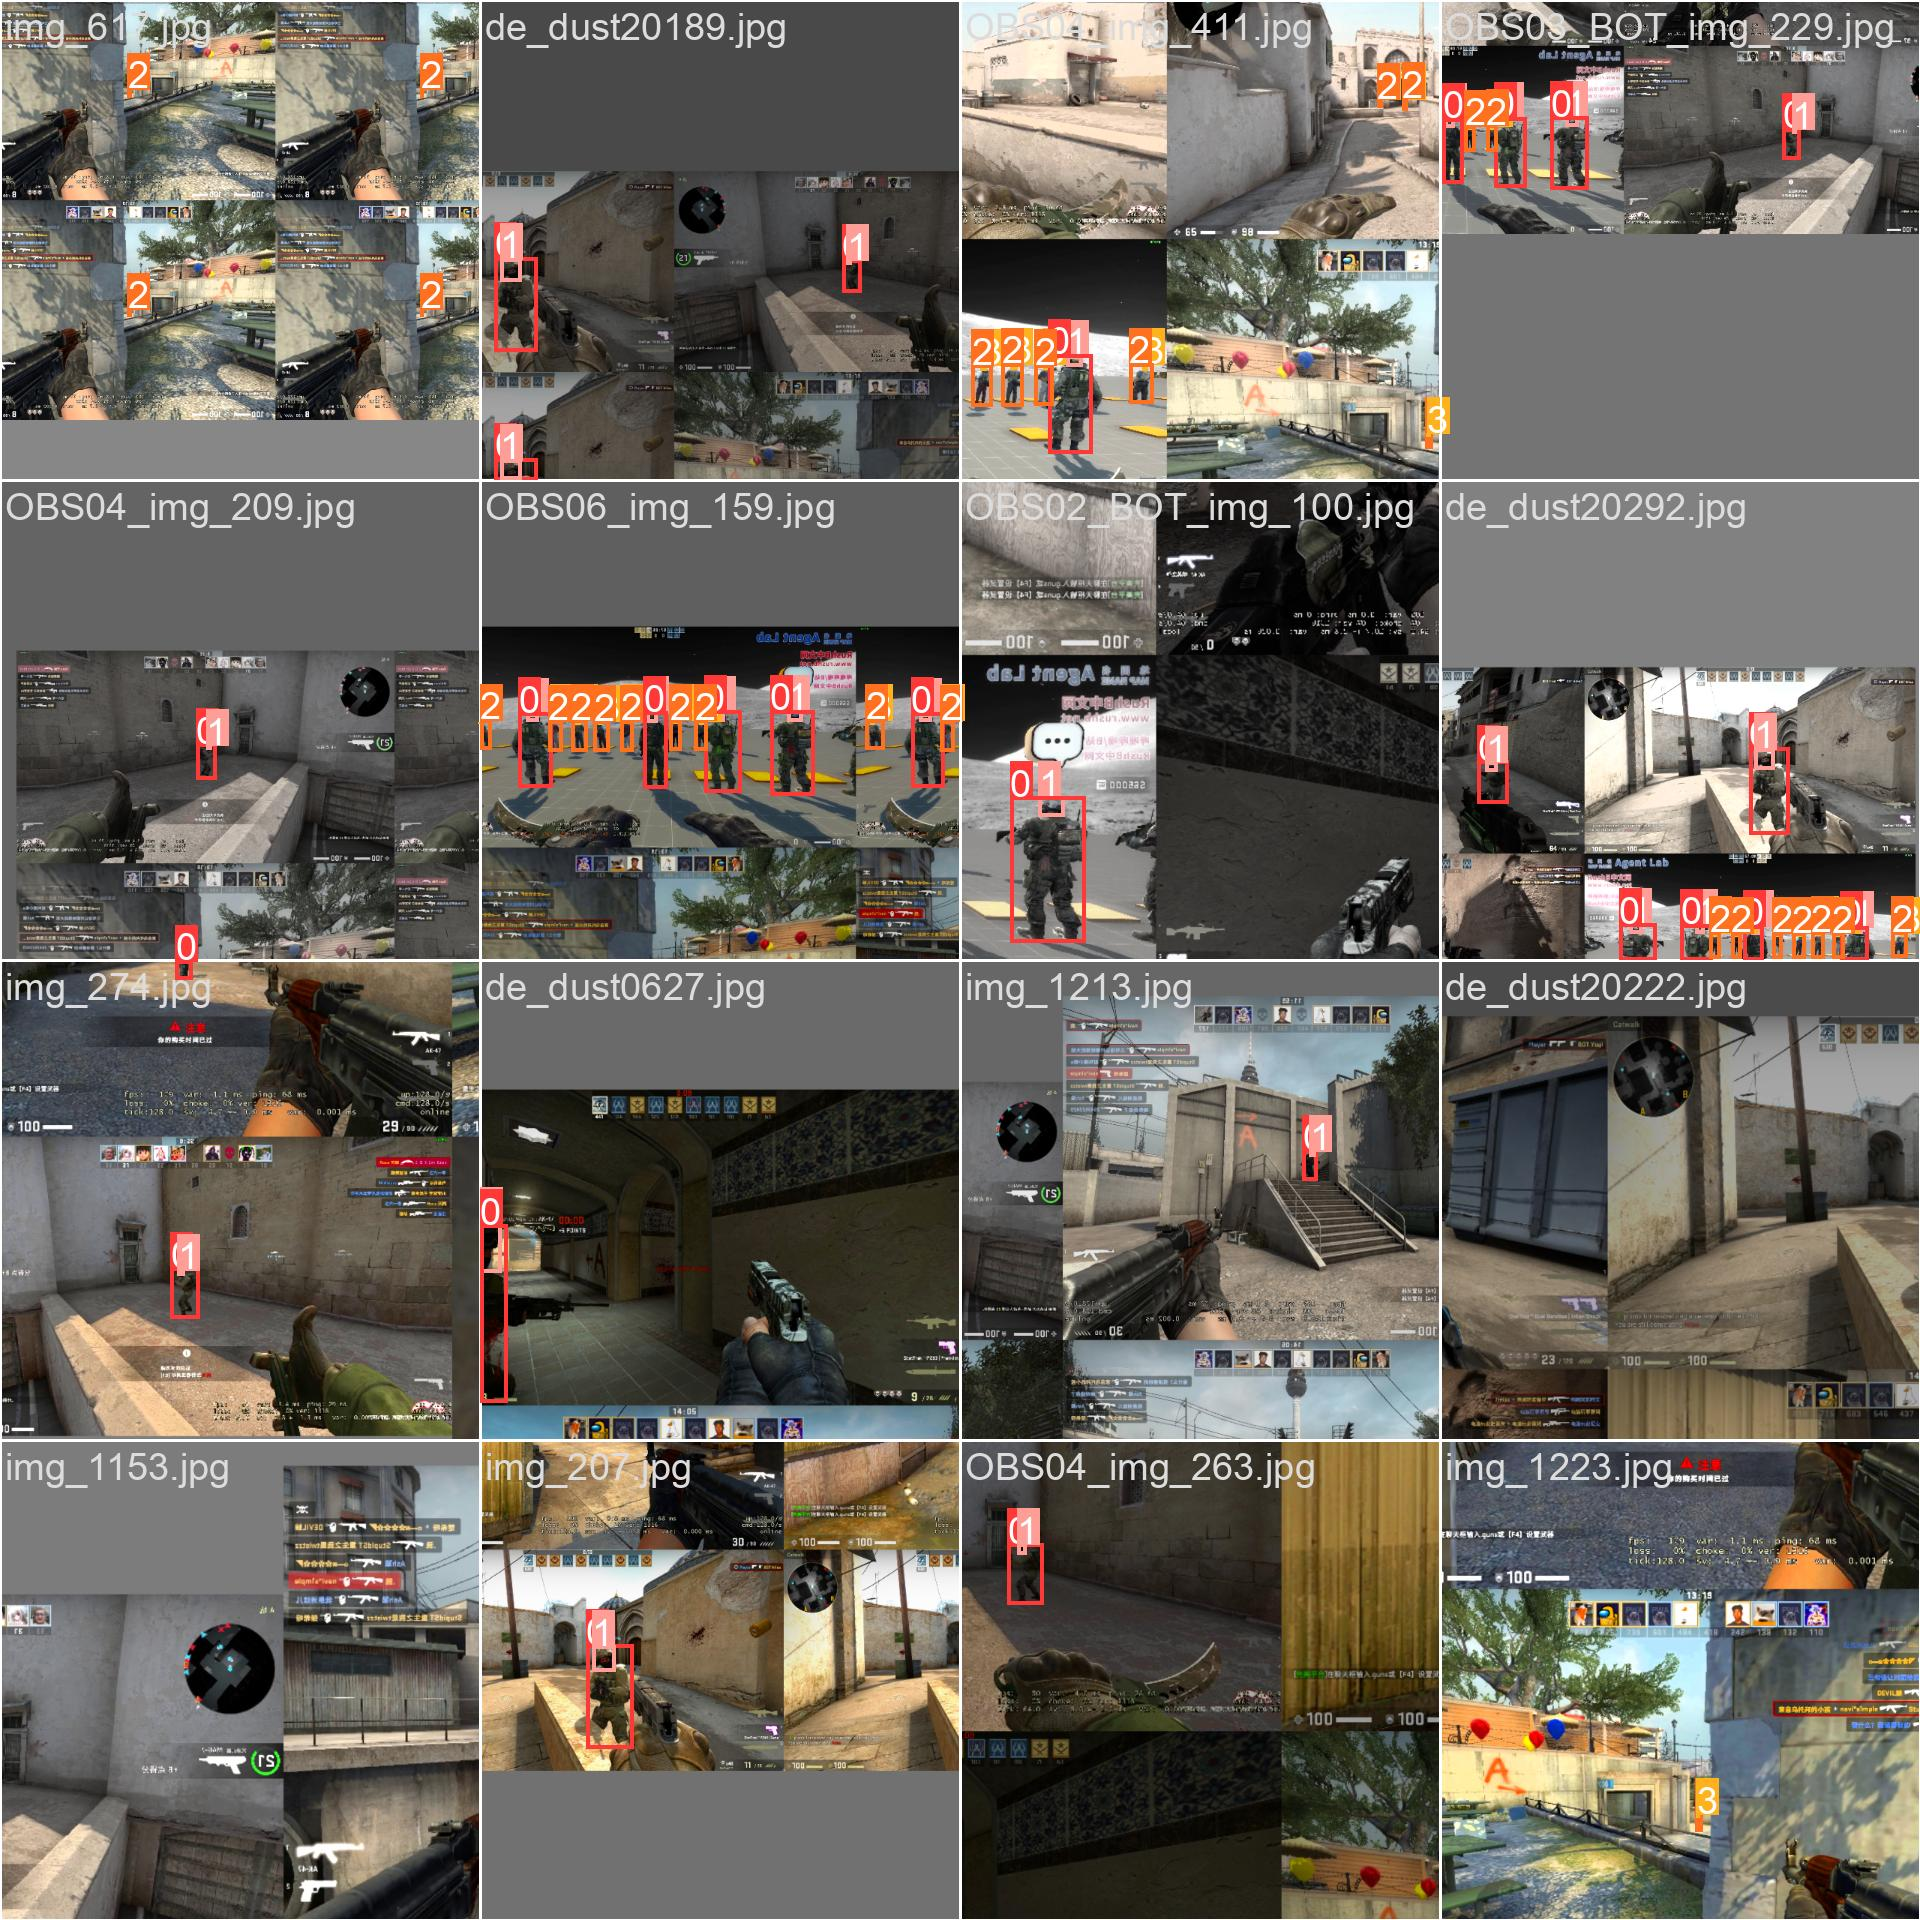

In [ ]:
Image(filename=f'{runs_path}/detect/train/train_batch0.jpg', width=900)

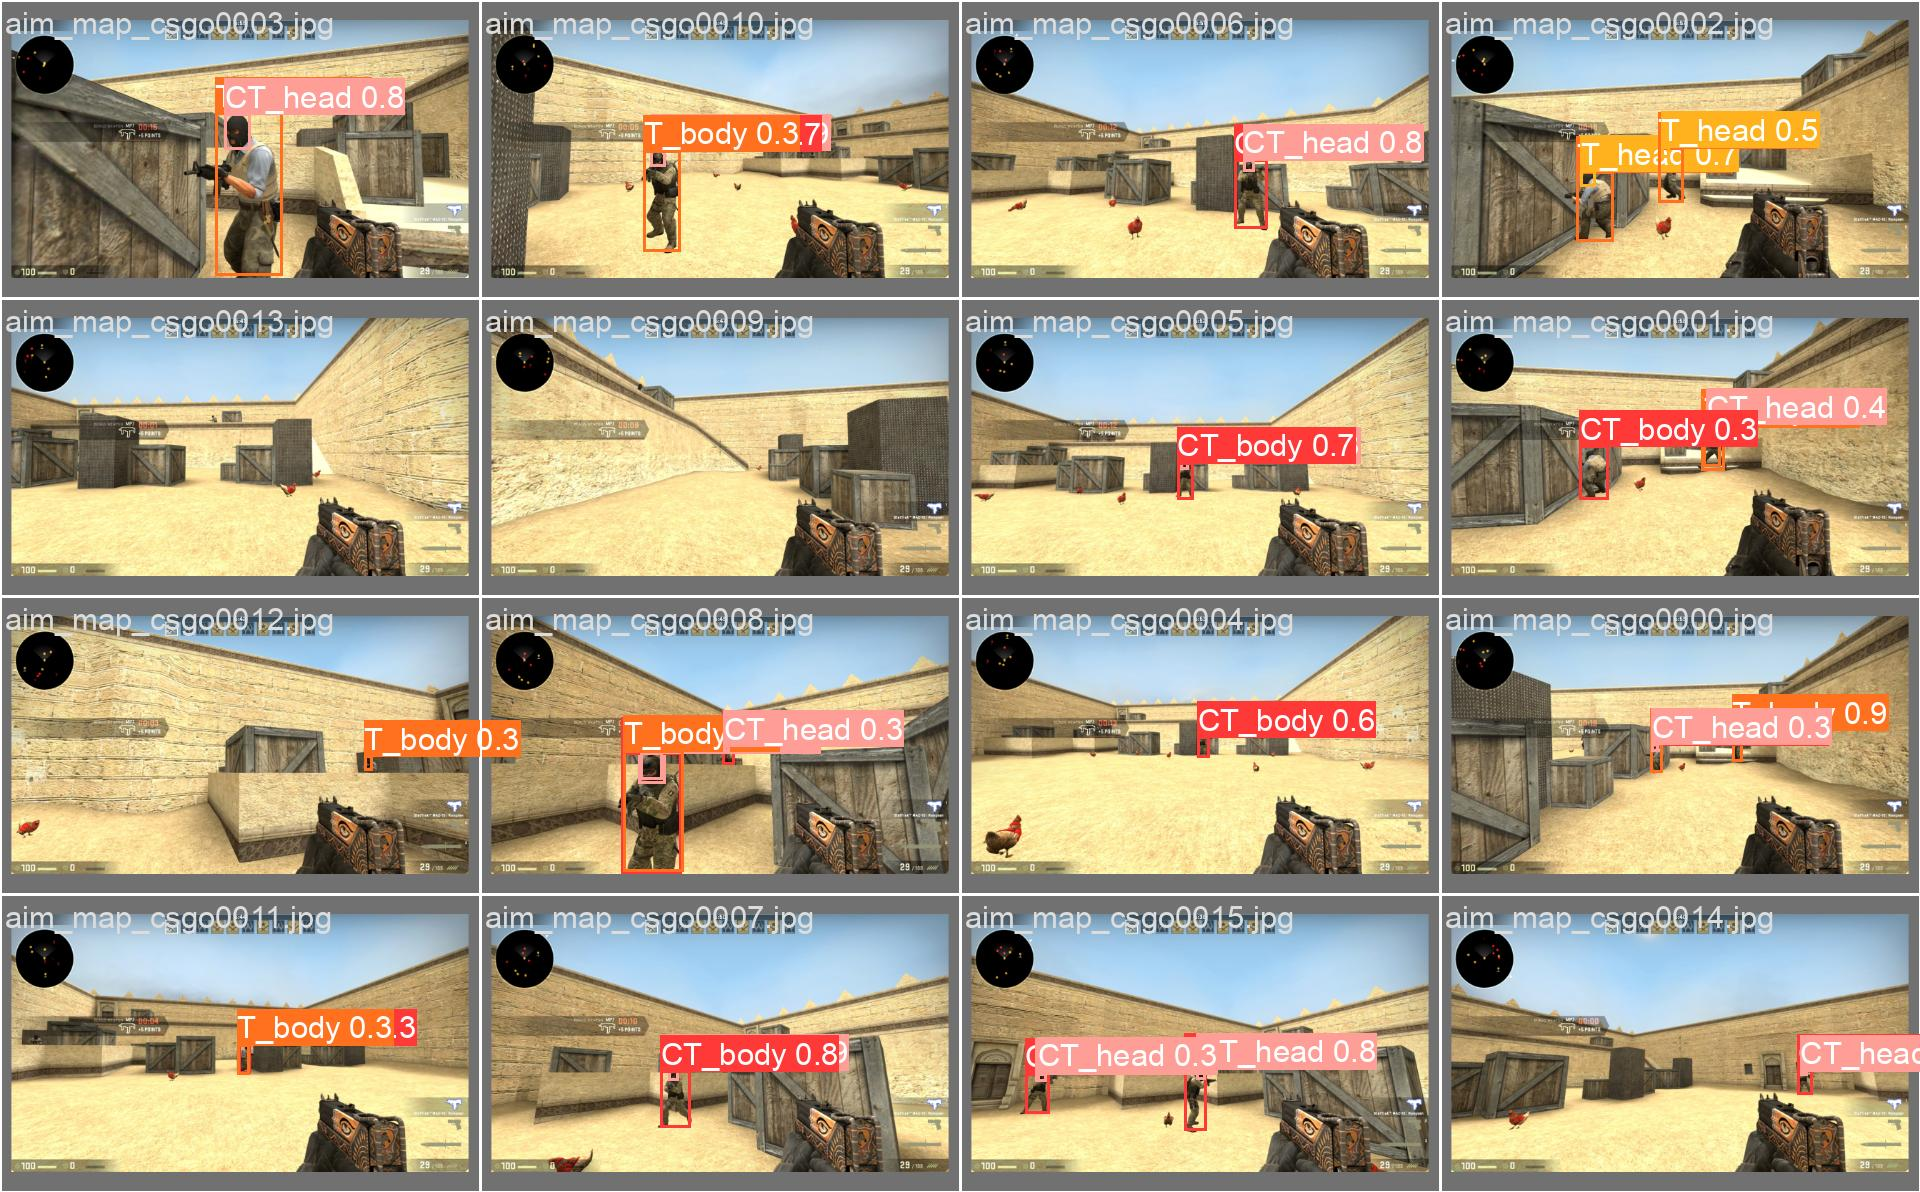

In [ ]:
Image(filename=f'{runs_path}/detect/train/val_batch0_pred.jpg', width=900)

## PRUEBAS

In [ ]:
infer = YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:
infer.predict(f'{root_dir}/Dataset/Test', save=True, save_txt=True)


image 1/82 /content/drive/MyDrive/Yolov8_detection/Dataset/Test/LX_01_img_300.jpg: 384x640 1 CT_body, 1 CT_head, 65.1ms
image 2/82 /content/drive/MyDrive/Yolov8_detection/Dataset/Test/OBS02_BOT_img_128.jpg: 384x640 (no detections), 6.4ms
image 3/82 /content/drive/MyDrive/Yolov8_detection/Dataset/Test/OBS02_BOT_img_137.jpg: 384x640 (no detections), 6.4ms
image 4/82 /content/drive/MyDrive/Yolov8_detection/Dataset/Test/OBS02_BOT_img_161.jpg: 384x640 (no detections), 6.6ms
image 5/82 /content/drive/MyDrive/Yolov8_detection/Dataset/Test/OBS02_BOT_img_20.jpg: 384x640 (no detections), 6.3ms
image 6/82 /content/drive/MyDrive/Yolov8_detection/Dataset/Test/OBS02_BOT_img_216.jpg: 384x640 (no detections), 6.5ms
image 7/82 /content/drive/MyDrive/Yolov8_detection/Dataset/Test/OBS02_BOT_img_36.jpg: 384x640 1 CT_body, 6.3ms
image 8/82 /content/drive/MyDrive/Yolov8_detection/Dataset/Test/OBS02_BOT_img_93.jpg: 384x640 1 CT_body, 1 CT_head, 6.2ms
image 9/82 /content/drive/MyDrive/Yolov8_detection/Datase

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'CT_body', 1: 'CT_head', 2: 'T_body', 3: 'T_head'}
 orig_img: array([[[39, 36, 32],
         [40, 37, 33],
         [39, 36, 32],
         ...,
         [26, 22, 21],
         [26, 22, 21],
         [26, 22, 21]],
 
        [[43, 40, 36],
         [43, 40, 36],
         [42, 39, 35],
         ...,
         [26, 22, 21],
         [26, 22, 21],
         [26, 22, 21]],
 
        [[39, 36, 32],
         [39, 36, 32],
         [41, 38, 34],
         ...,
         [26, 22, 21],
         [26, 22, 21],
         [26, 22, 21]],
 
        ...,
 
        [[56, 44, 32],
         [56, 44, 32],
         [56, 44, 32],
         ...,
         [35, 41, 40],
         [35, 41, 40],
         [35, 41, 40]],
 
        [[56, 44, 32],
         [56, 44, 32],
         [56, 44, 32],
         ...,
         [35, 41, 40],
         [35, 41, 40],
      

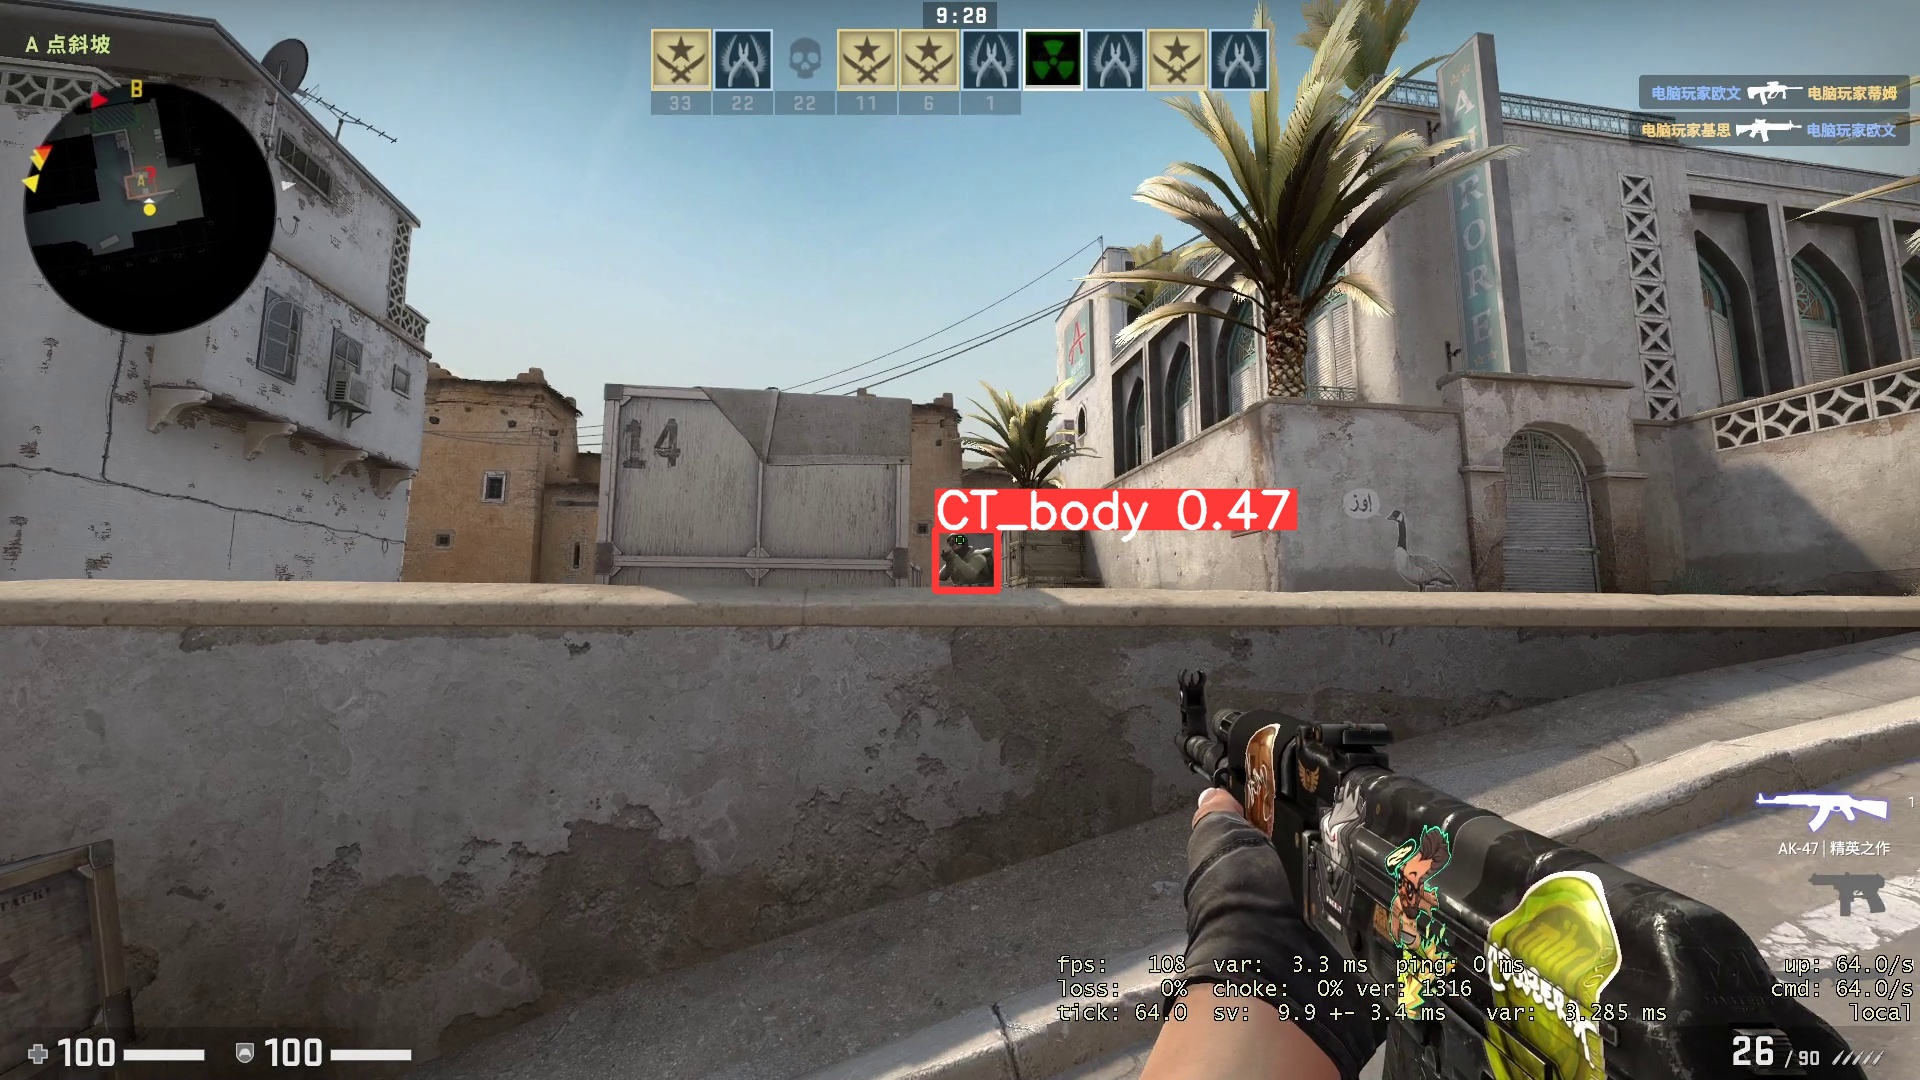

In [ ]:
Image(filename=f'{runs_path}/detect/predict/OBS02_BOT_img_36.jpg', width=900)

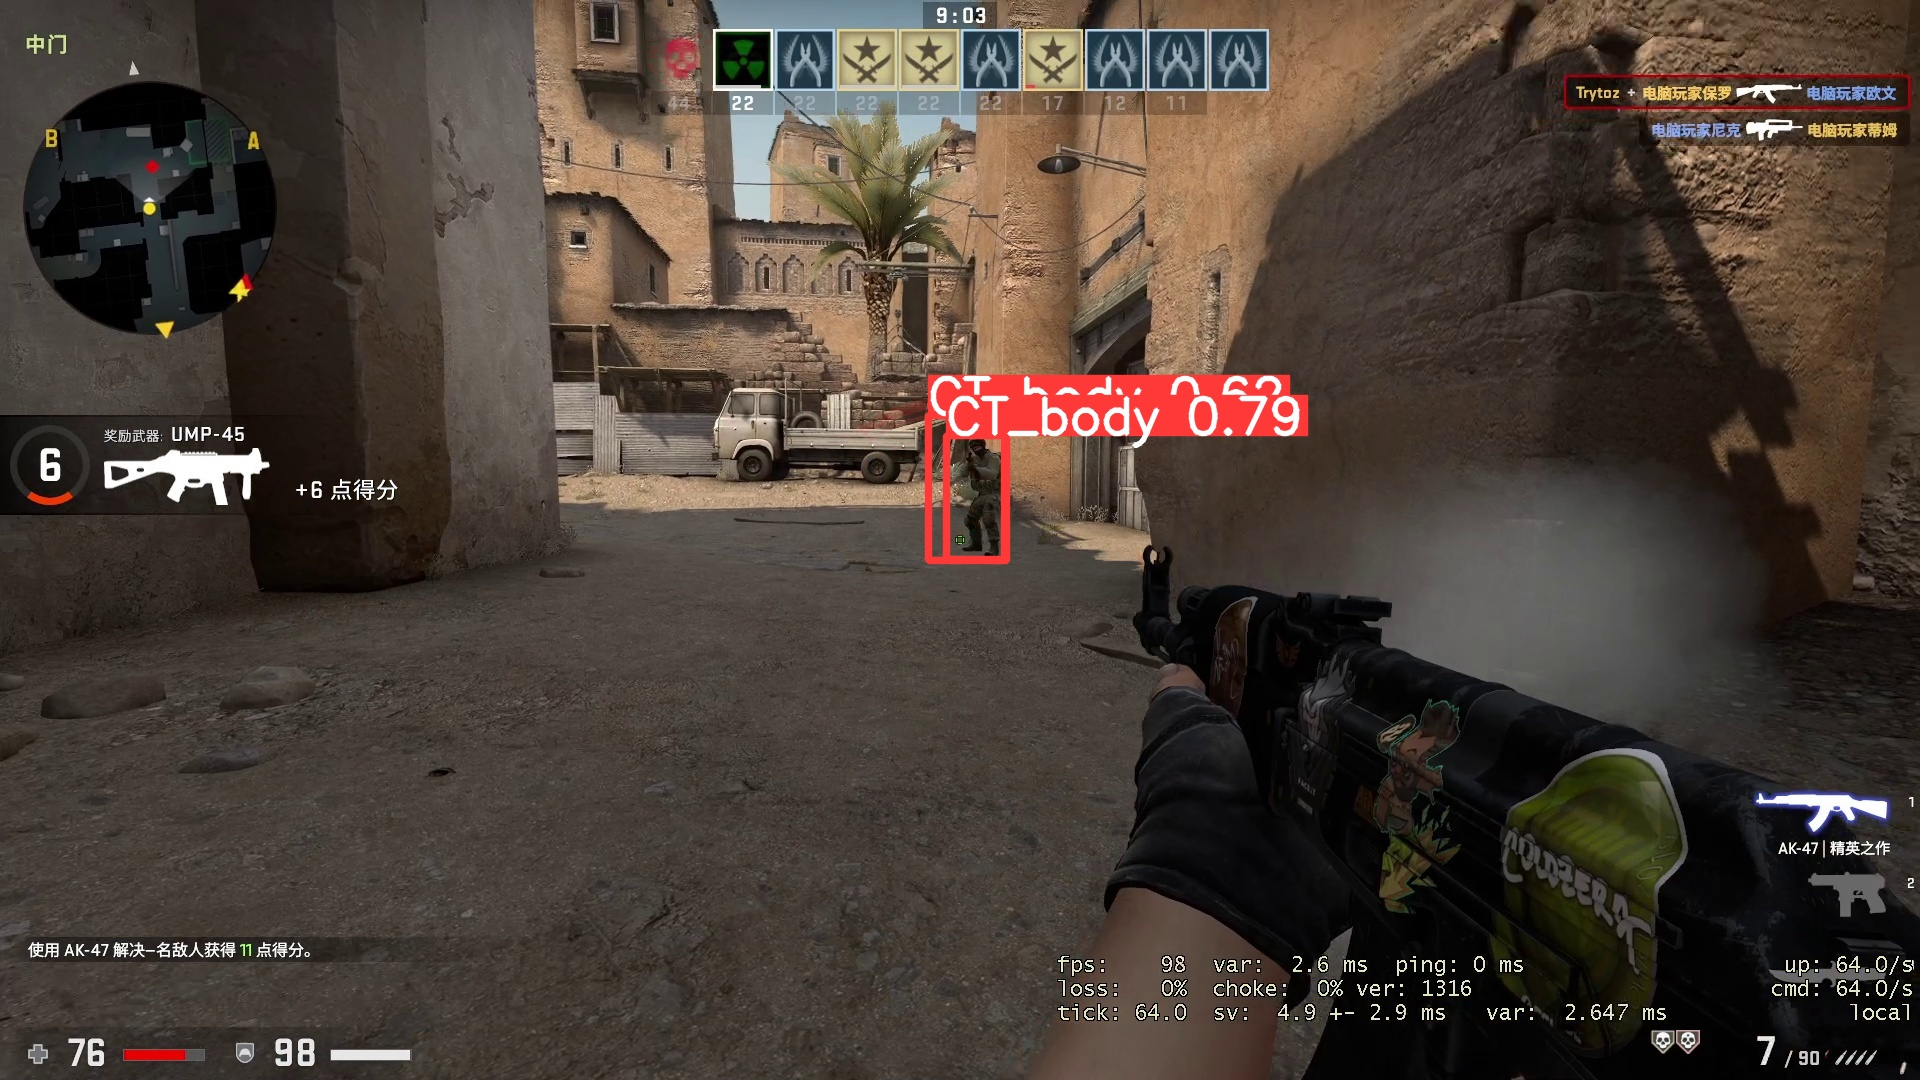

In [ ]:
Image(filename=f'{runs_path}/detect/predict/OBS02_BOT_img_98.jpg', width=900)

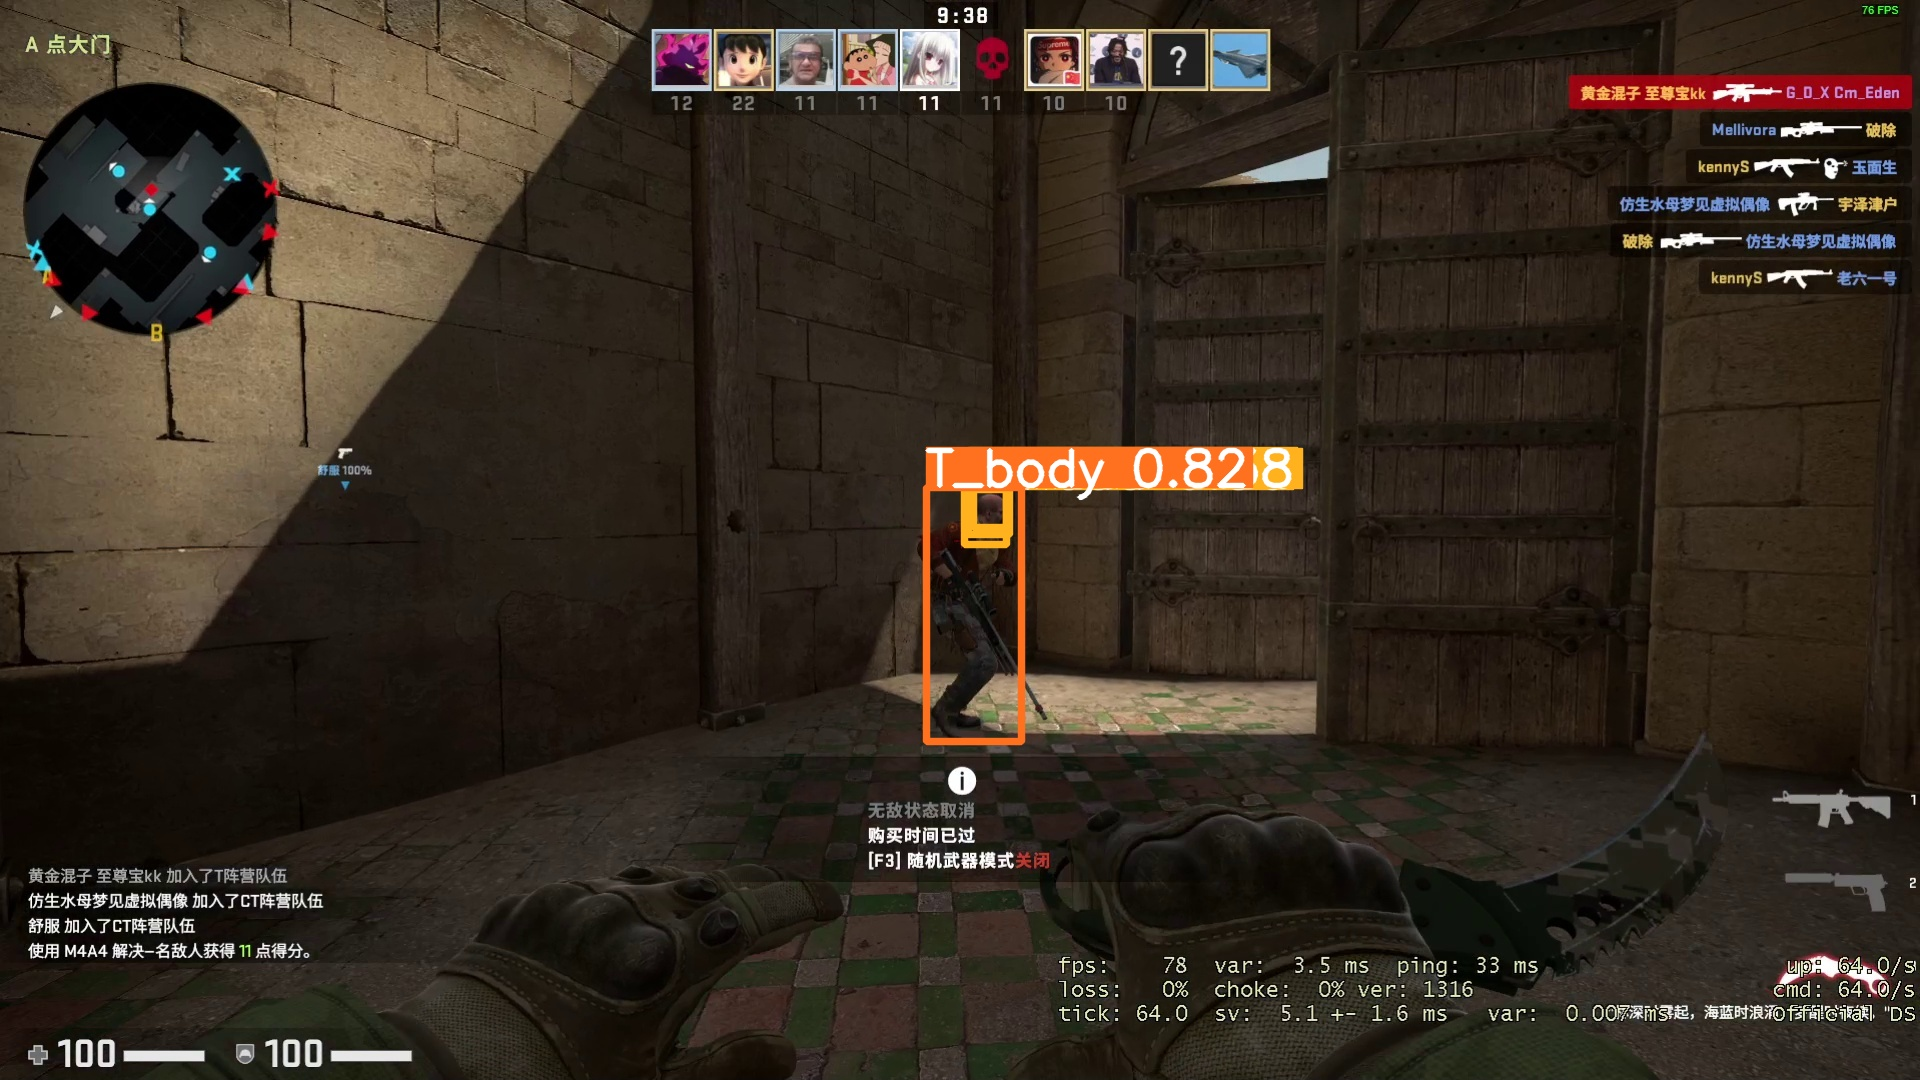

In [ ]:
Image(filename=f'{runs_path}/detect/predict/OBS04_img_116.jpg', width=900)

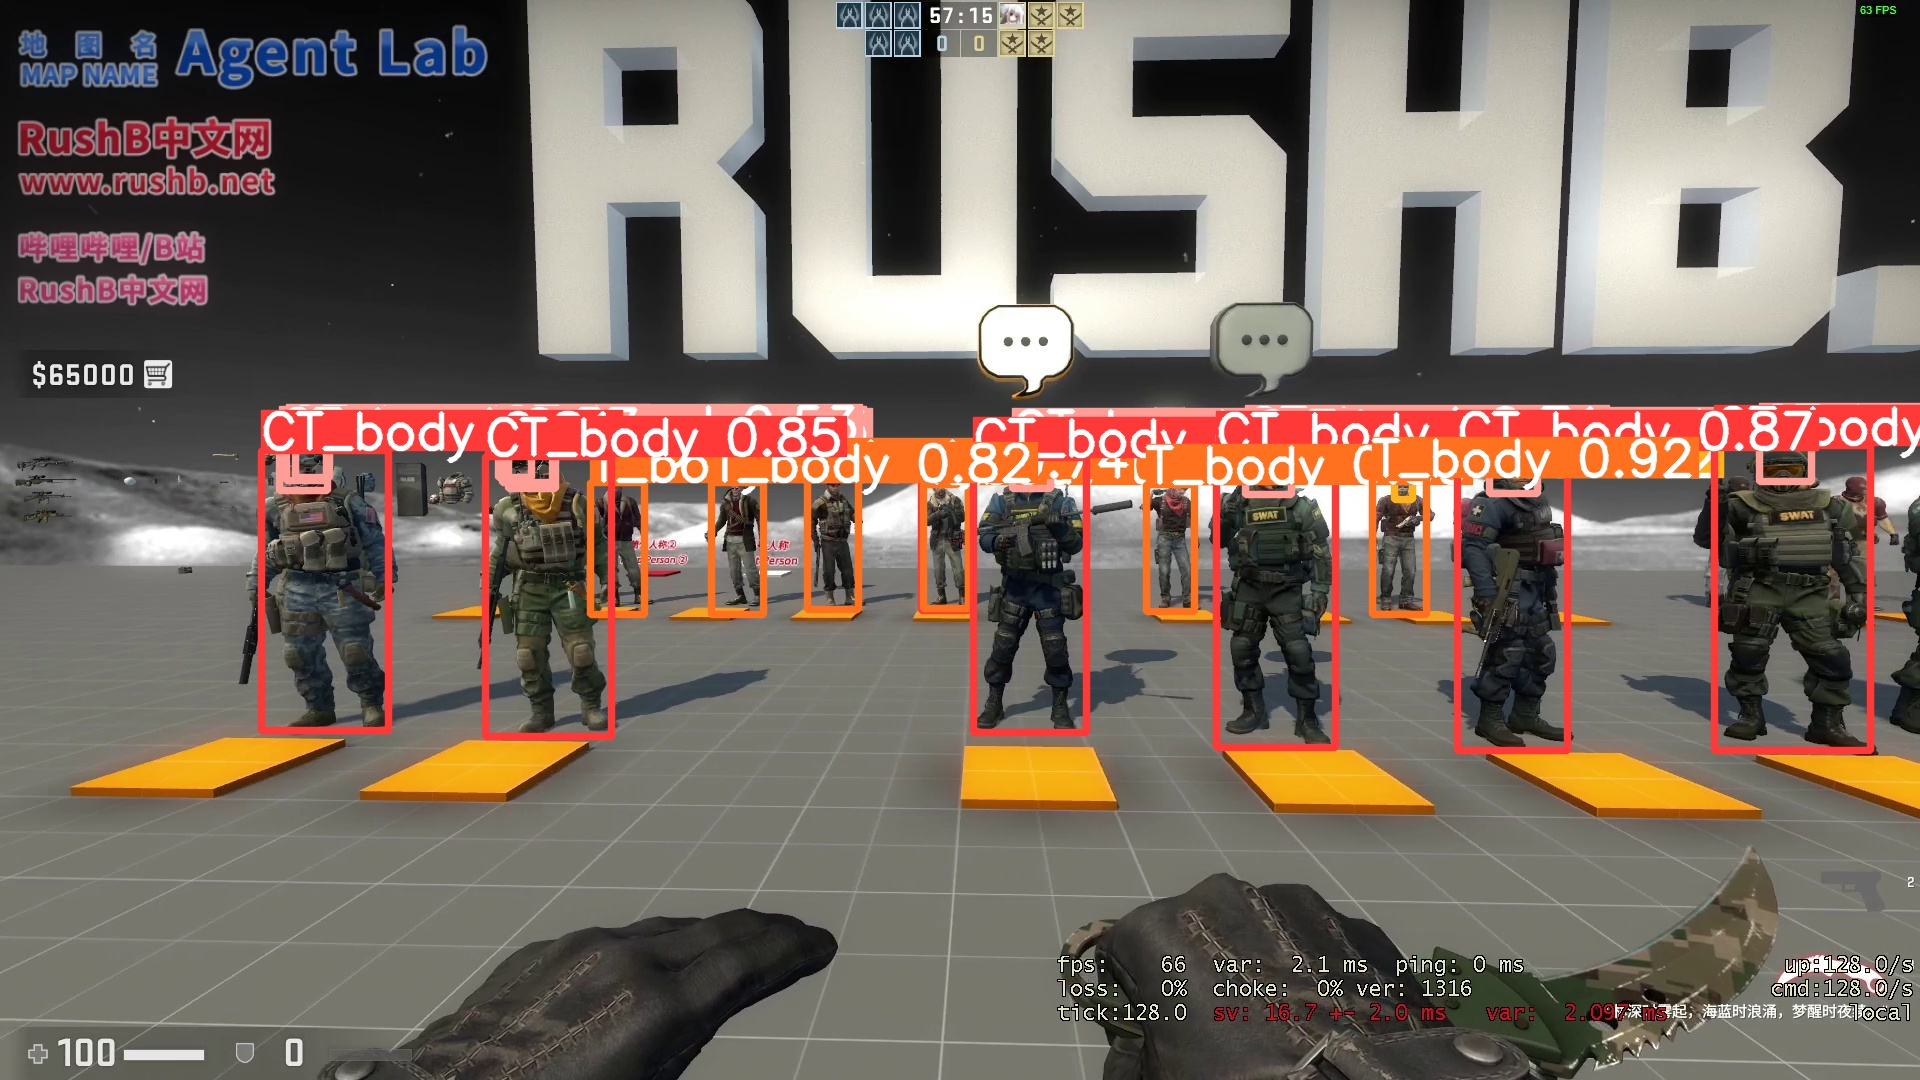

In [ ]:
Image(filename=f'{runs_path}/detect/predict/OBS06_img_104.jpg', width=900)

### Referencias:
- https://github.com/ultralytics/ultralytics/issues/793
- https://blog.roboflow.com/whats-new-in-yolov8/
- https://docs.ultralytics.com/quickstart/#use-ultralytics-with-python
